# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [162]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [25]:
from typing import Tuple, Optional, Any, Dict, List
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

RANDOM_STATE = 42  # фиксируем зерно случайности
CURR_DATE = str(datetime.now().date())  # сегодняшняя дата
DAYS_PER_YEAR = 365  # количество дней в году
pd.options.mode.chained_assignment = None

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:** Все формулы взяты из лекции.


$$
y(x) = \Theta x, \quad \text{где } x \in \mathbb{R}, \, \Theta \in \mathbb{R}.
$$

$$
Y_i = \Theta x_i + \varepsilon_i, \quad \text{где } i \in \{1, \dots, n\}, \, x_i \in \mathbb{R} \text{ — неслучайны}, \, \varepsilon_i \text{ — случайные ошибки}.
$$

### 1)  
$$
\hat{\Theta} = (X^T X)^{-1} X^T Y = \left( \sum_{i=1}^{n} x_i^2 \right)^{-1} \cdot \sum_{i=1}^{n} (\Theta x_i^2 + \varepsilon_i x_i)
$$

### 2) Градиентный спуск (GD)  
$$
\Theta_{t+1} = \Theta_t - \eta \sum_{i=1}^{n} x_i (x_i^T \Theta_t - Y_i)
$$
$$
где \ \eta \ — \ удвоенный \ шаг \ обучения.
$$

### Стохастический спуск (SGD)  
$$
\Theta_{t+1} = \Theta_t - \eta \frac{n}{k} \sum_{j=1}^{k} x_{i_j} (x_{i_j}^T \Theta_t - Y_{i_j})
$$
$$
где \ \eta \ — \ уменьшенный \ шаг \ обучения.
$$

$$
i_1, \dots, i_k \ — \ сгенерированные \ заранее.
$$

$$
i_1, \dots, i_k \sim U\{1, \dots, n\} \ — \ независимое \ с \ повторениями.
$$

### 3) Влияние больших ошибок

На МНК - большое влияние, т.к обрабатываем квадарты значений, квдарат большой ошибки -> оценка смещена в эту сторону.

Для градиентного спуска -- по-прежнему большое влияние(по той же причине).

Для стохастического ситуация получше - ошибки будут играть роль в тех наборах, где эти ошибки попали в выборку i-шек.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [90]:
data = pd.read_csv("day.csv")
data.drop(columns = ['casual', 'registered', 'dteday', 'yr'], inplace = True)
data.drop(data.columns[0], axis = 1, inplace = True)

train, test = train_test_split(data, train_size = 0.8, random_state = RANDOM_STATE)
data

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Text(0, 0.5, 'Число аренд')

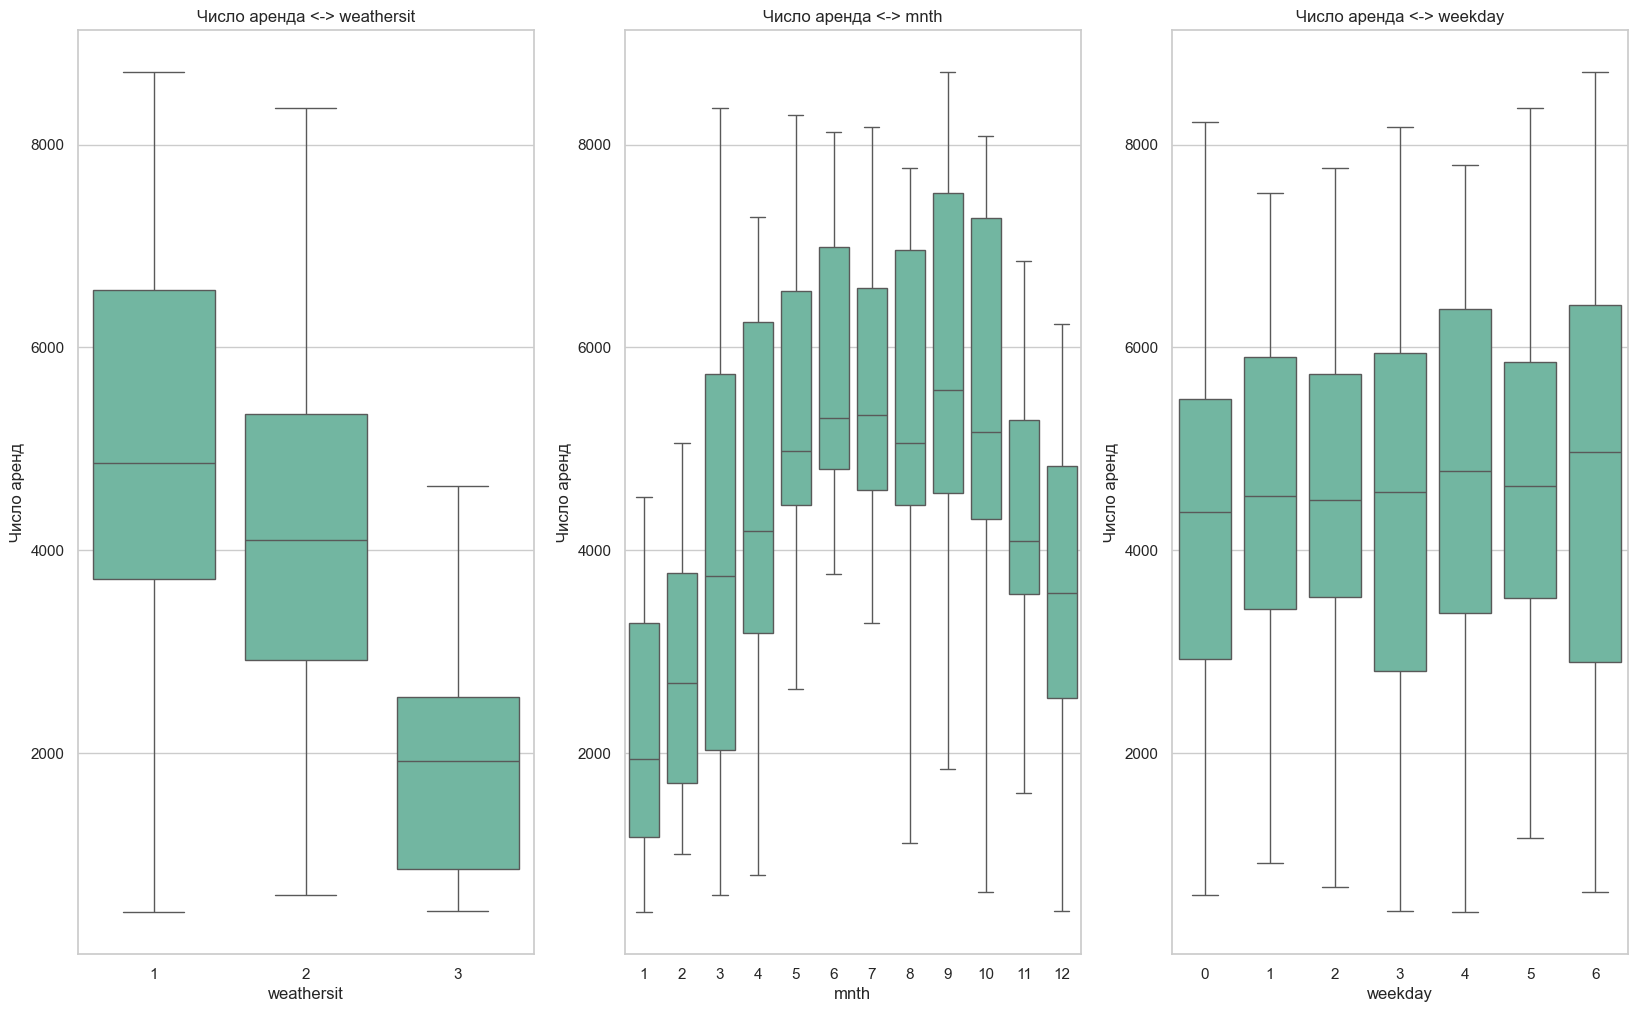

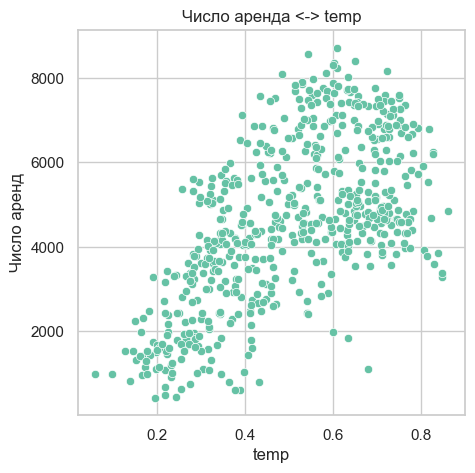

In [89]:
target_feature = 'cnt'
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday']
real_features = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']

usefull_features = ['weathersit', 'mnth', 'weekday']

fig, axes = plt.subplots(1, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(usefull_features):
    sns.boxplot(x=feature, y='cnt', data=train, ax=axes[i])
    axes[i].set_title(f'Число аренда <-> {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Число аренд')
    
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(x='temp', y='cnt', data=train, ax=axes)
axes.set_title(f'Число аренда <-> temp')
axes.set_xlabel('temp')
axes.set_ylabel('Число аренд')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** 
1) Как таковых, выбросов не обнаружил.
2) При взгляде на графики зависимостей числа аренд велосипедов от mnth, temp и weathersit можно заметить некое подобие параболы. Так что я бы рассмотрел квдарат.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** 
1) Категориальные признаки закодируем с OneHotEncoder(из одного категориального - столько соотв бинарных, сколько различных значений у признака)
2) также можно было бы закодировать(поработать над масштабом) временных признаков, но таковых нет.

Реализуйте данную процедуру.

In [98]:
encoder = OneHotEncoder(drop="first", sparse_output=False)  # объявляем модель
# Внимание! Нельзя вызывать fit_transform на тестовых данных!
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_update = np.hstack((train[real_features], train_cat)) # объединили все признаки, т.к сделали их всех вещественными

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [117]:
model_full = LinearRegression()
model_full.fit(train_update, train[target_feature])
model_full.coef_, model_full.intercept_

(array([ 7035.95681198,   219.99970322, -2942.71206491, -3221.25354296,
         -478.43935956,   932.17094995,   610.04670382,  1572.1011237 ,
           26.5110265 ,   387.6850721 ,  -270.33122324,   -69.89657598,
         -650.88066038, -1261.02340637,  -728.18004966,   314.93040241,
           25.51147656,  -390.34001362,  -136.42262081,  -355.70829689,
           53.9583579 ,   -71.30869584,   -72.79143532,   -93.4556602 ,
          145.52761051,   463.27145716,   317.63847394]),
 np.float64(3268.638236380128))

In [127]:
model_temp = LinearRegression()
model_temp.fit(train[["temp"]], train[target_feature])
y_pred = model_temp.predict(test[["temp"]])
model_temp.coef_, model_temp.intercept_

(array([6575.39325735]), np.float64(1272.1573369376383))

In [128]:
model_mnth = LinearRegression()
model_mnth.fit(train[["mnth"]], train[target_feature])
y_pred = model_mnth.predict(test[["mnth"]])
model_mnth.coef_, model_mnth.intercept_

(array([169.24908088]), np.float64(3466.3651053579297))

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [ ]:
test_cat = encoder.transform(test[categorial_features])
test_update = np.hstack([test[real_features], test_cat])

In [134]:
model_dict = {
    "temp": {"model": model_temp},
    "mnth": {"model": model_mnth},
    "все признаки": {"model": model_full},
}

# Обучающие данные для каждой модели, отличаются только набором признаков
train_data = {
    "temp": train[["temp"]],
    "mnth": train[["mnth"]],
    "все признаки": train_update,
}

# Тестовые данные для каждой модели, отличаются только набором признаков
test_data = {
    "temp": test[["temp"]],
    "mnth": test[["mnth"]],
    "все признаки": test_update,
}

for name, data in model_dict.items():
    model = data["model"]
    data["train_preds"] = model.predict(train_data[name])
    data["test_preds"] = model.predict(test_data[name])
    
test_pred = model_dict["все признаки"]["test_preds"]

RMSE

In [107]:
metrics.mean_squared_error(test[target_feature], test_pred) ** 0.5

1393.4933247740173

MAE

In [108]:
metrics.mean_absolute_error(test[target_feature], test_pred)

1194.6796010509902

MAPE

In [109]:
def mean_absolute_percentage_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Вычисляет среднюю абсолютную процентную ошибку (MAPE).

    Параметры:
    y_true (np.ndarray): Истинные значения целевой переменной.
    y_pred (np.ndarray): Прогнозируемые значения.

    Возвращает:
    float: Средняя абсолютная процентная ошибка (MAPE) в процентах.
    """
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

mean_absolute_percentage_error(test[target_feature], test_pred)

np.float64(135.5270437512057)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [111]:
def get_regression_metrics_df(
    y_true: pd.Series, model_dict: Dict[str, Dict[str, List[float]]], pred_type: str = "test_preds"
) -> pd.DataFrame:
    """
    Вычисляет метрики качества регрессионной модели для нескольких моделей:
    RMSE, MAE, MAPE, R2 и выводит их в виде pandas DataFrame.

    Параметры:
    y_true (pd.Series): Истинные значения целевой переменной.
    model_dict (Dict[str, Dict[str, List[float]]]): Словарь с моделями и предсказаниями,
        где ключи — имена моделей, а значения — словари с ключами "model", "train_preds", "test_preds".
    pred_type (str, optional): Строка, указывающая, какие предсказания использовать
        (по умолчанию "test_preds").

    Возвращает:
    pd.DataFrame: DataFrame с метриками качества моделей.
    """

    metric_names = ["RMSE", "MAE", "MAPE", "R2"]

    # Подготовка данных для DataFrame
    data = []
    for model_name, model_data in model_dict.items():
        # Выбираем нужные предсказания в зависимости от аргумента pred_type
        y_pred = model_data.get(pred_type, [])

        # Вычисляем метрики
        rmse = metrics.mean_squared_error(y_true, y_pred) ** 0.5
        mae = metrics.mean_absolute_error(y_true, y_pred)
        mape = metrics.mean_absolute_percentage_error(y_true, y_pred)
        r2 = metrics.r2_score(y_true, y_pred)

        # Добавляем данные в список
        data.append([model_name, rmse, mae, mape, r2])

    # Создание DataFrame
    metrics_df = pd.DataFrame(data, columns=["Model"] + metric_names).set_index("Model")

    return metrics_df

Тестовая выборка

In [135]:
get_regression_metrics_df(test[target_feature], model_dict)

,RMSE,MAE,MAPE,R2
Model,,,,
temp,1546.302650,1291.968899,1.689344,0.403710
mnth,1994.567202,1663.569477,2.187101,0.007877
все признаки,1393.493325,1194.679601,1.355270,0.515740


Обучающая выборка

In [136]:
get_regression_metrics_df(train[target_feature], model_dict, pred_type="train_preds")

,RMSE,MAE,MAPE,R2
Model,,,,
temp,1497.674690,1236.581387,0.405915,0.388104
mnth,1824.676537,1477.399548,0.552810,0.091731
все признаки,1234.040648,1057.804146,0.305500,0.584566


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**
При использовании большего числа признаков при построении модели очевидным образом получаем более точные значения коэффициентов(очев из резов MAPE).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

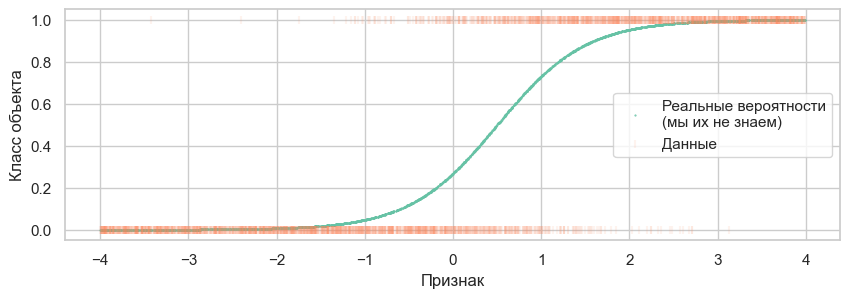

In [139]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pd.set_option("future.no_silent_downcasting", True)

In [146]:
model = LogisticRegression(fit_intercept = True, penalty = None, solver="lbfgs")
model.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [153]:
model.coef_.ravel(), model.intercept_

(array([1.84645557]), array([-0.94730154]))

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

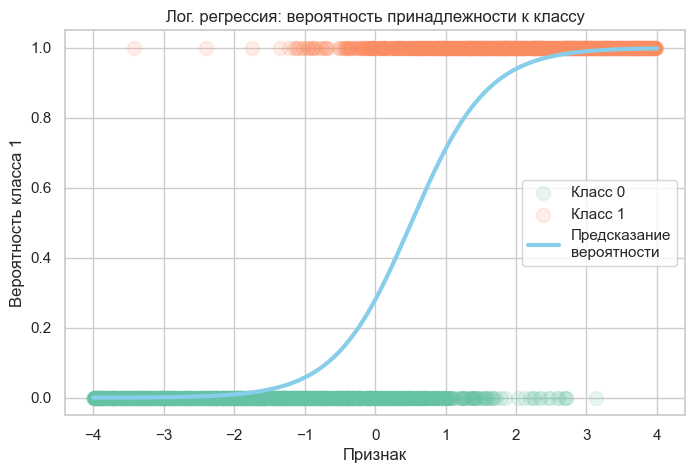

In [157]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
probabilities = model.predict_proba(X_grid)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0], np.zeros_like(X[y == 0]), s=100, label="Класс 0", alpha=0.15)
plt.scatter(X[y == 1], np.ones_like(X[y == 1]), s=100, label="Класс 1", alpha=0.15)
plt.plot(X_grid, probabilities, label="Предсказание\nвероятности", c="skyblue", linewidth=3)
plt.title("Лог. регрессия: вероятность принадлежности к классу")
plt.xlabel("Признак")
plt.ylabel("Вероятность класса 1")
plt.legend()
plt.show()


Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [161]:
bins = np.arange(-4, 4.2, 0.2)
df = pd.DataFrame({'X': X.flatten(), 'y': y})


Повторите проведенное исследование для следующих данных и сравните результаты.

In [ ]:
# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

**Выводы:**

...

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [ ]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

...

Реализация:

In [ ]:
...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

...

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.